# Desafío Spike 2021-1
### Loreto Martínez Prieto  


 Objetivo: predecir el precio de un insumo básico (leche), usando variables climatológicas y macroeconómicas. 

### Índice
1. Datos
  - carga de archivos
2. Análisis de datos
  - exploración de datos
  - pre-procesamiento de datos 
3. Visualización 
  - funciones series históricas precipitaciones
  - función series históricas PIB
4. Tratamiento y creación de variables 
  - correlación
  - datos leche 
  - creación de variables
5. Modelo 
  - modelo predicción precio de la leche próximo mes
  - cross validation 
  - evaluación del modelo 

In [251]:
import pandas as pd      #Importamos librerías 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### 1. Datos



In [252]:
#Cargamos los archivos
precipitaciones = pd.read_csv('precipitaciones.csv')  
banco_central = pd.read_csv('banco_central.csv')

### 2. Análisis de datos
#### 2.1. Precipitaciones


In [253]:
#Preview de los datos 
precipitaciones.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [254]:
precipitaciones.shape

(496, 9)

In [255]:
precipitaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 496 non-null    object 
 1   Coquimbo                             496 non-null    float64
 2   Valparaiso                           496 non-null    float64
 3   Metropolitana_de_Santiago            496 non-null    float64
 4   Libertador_Gral__Bernardo_O_Higgins  496 non-null    float64
 5   Maule                                496 non-null    float64
 6   Biobio                               496 non-null    float64
 7   La_Araucania                         496 non-null    float64
 8   Los_Rios                             496 non-null    float64
dtypes: float64(8), object(1)
memory usage: 35.0+ KB


In [256]:
precipitaciones.columns

Index(['date', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios'],
      dtype='object')

In [257]:
precipitaciones['Fecha'] = precipitaciones['date'].str[:-3]    #Descartamos el día en la columna fecha

Preprocesamiento de datos de precipitaciones.

Vemos que la columna fecha está en formato 'object', por lo que lo convertimos al formato datetime64 en ns 

In [258]:
precipitaciones.date = pd.to_datetime(precipitaciones.date)

In [259]:
print(precipitaciones.isnull().sum())

date                                   0
Coquimbo                               0
Valparaiso                             0
Metropolitana_de_Santiago              0
Libertador_Gral__Bernardo_O_Higgins    0
Maule                                  0
Biobio                                 0
La_Araucania                           0
Los_Rios                               0
Fecha                                  0
dtype: int64


No hay missing values en este DataFrame. 
Formato fecha: aaaa-mm.
Al revisar más exhaustivamente notamos que tampoco hay outliers o valores erróneos. 

In [260]:
precipitaciones.drop_duplicates(subset='date')   #eliminar filas con fechas duplicadas

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Fecha
0,1989-02-01,0.719033,0.117045,0.028272,0.000000,0.724667,9.172945,22.595834,52.268010,1989-02
1,1998-10-01,0.065216,0.000000,0.011493,0.000000,0.008968,2.089674,14.702087,45.142041,1998-10
2,2001-02-01,2.030026,0.047987,0.002634,0.000000,0.032163,10.768351,29.465057,65.571098,2001-02
3,2008-11-01,0.622784,0.000000,0.015872,0.000000,1.734168,25.083557,64.901645,113.093488,2008-11
4,2009-04-01,0.008065,0.000000,0.009396,0.000000,12.080715,56.233424,96.364235,155.622235,2009-04
...,...,...,...,...,...,...,...,...,...,...
491,1988-10-01,0.000000,0.019886,4.621711,8.260992,27.616980,69.572460,133.732635,181.879767,1988-10
492,2019-08-01,0.000000,0.430990,4.509748,9.900806,49.285557,108.404827,155.448370,233.621020,2019-08
493,2015-06-01,0.000000,0.325714,4.888708,33.152636,117.695499,255.274275,343.280205,386.836253,2015-06
494,2016-09-01,0.000000,0.035860,1.066980,3.090961,18.736997,45.646802,74.499307,119.114419,2016-09


In [261]:
# Create time stamp 
index = pd.date_range(start='1979-1-1', end='2020-4-1', freq='M')
period_index = index.to_period()    #convert to time period 
index

DatetimeIndex(['1979-01-31', '1979-02-28', '1979-03-31', '1979-04-30',
               '1979-05-31', '1979-06-30', '1979-07-31', '1979-08-31',
               '1979-09-30', '1979-10-31',
               ...
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31'],
              dtype='datetime64[ns]', length=495, freq='M')

In [262]:
precipitaciones.set_index('date', inplace=True)
precipitaciones.sort_index(inplace=True)

Con el fin de visualizar los datos, graficamos las precipitaciones de todas las regiones. 

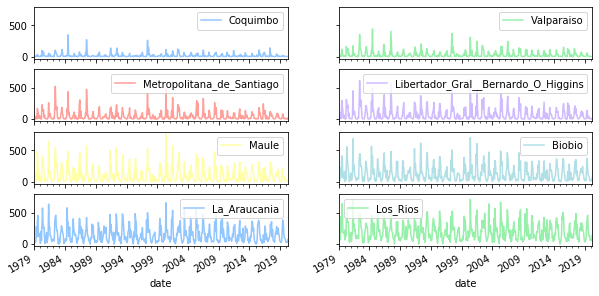

In [263]:
plt.style.use('seaborn-pastel')
precipitaciones.plot(subplots=True, layout=(8, 2), figsize=(10, 10), 
                     sharex=True, sharey=True)
plt.show()

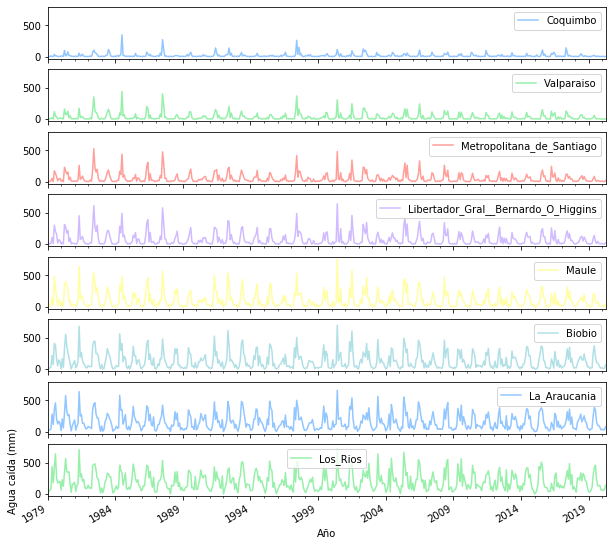

### 2. Análisis de datos
#### 2.2. Banco Central

2.2. a) Exploración de datos

In [265]:
banco_central.head()   

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


In [266]:
banco_central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Periodo                                                                             614 non-null    object 
 1   Imacec_empalmado                                                                    300 non-null    object 
 2   Imacec_produccion_de_bienes                                                         300 non-null    object 
 3   Imacec_minero                                                                       300 non-null    object 
 4   Imacec_industria                                                                    301 non-null    object 
 5   Imacec_resto_de_bienes                                                              300 non-null   

Notamos que este dataframe tiene muchos datos faltantes en varias columnas. 
Además, hay varias variables que probablemente están perfectamente correlacionadas. 

In [267]:
#Inmediatamente descartamos una columna que tiene solo 10 datos y no usaremos 
del banco_central['No_sabe__No_responde_Miles_de_personas']


In [268]:
print(banco_central.loc[[89]])    #A partir de un error, notamos una fila errónea

In [269]:
banco_central.drop(banco_central.loc[[89]].index, inplace=True)   
# Eliminamos la fila completa errónea (fecha con mes 13)

In [270]:

banco_central['Periodo'] = banco_central['Periodo'].str[:10]  
banco_central['Fecha'] = banco_central['Periodo'].str[:-3]  
#Eliminamos la hora de la columna Periodo
banco_central

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,Fecha
0,2013-03-01,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0,2013-03
1,2013-04-01,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0,2013-04
2,2013-05-01,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0,2013-05
3,2013-06-01,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0,2013-06
4,2013-07-01,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0,2013-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2008-08-01,792.872.358,809.540.557,844.433.727,862.655.599,721.027.743,640.625.573,829.163.596,799.073.886,786.659.097,...,NaN,847.665.895,NaN,905.764.363,475.746.478,NaN,NaN,NaN,NaN,2008-08
610,2008-09-01,786.802.278,814.228.983,875.931.483,85.990.071,693.602.068,629.581.947,810.645.789,791.396.405,772.867.447,...,NaN,859.131.907,NaN,894.789.858,453.055.435,NaN,NaN,NaN,NaN,2008-09
611,2008-10-01,841.834.519,896.565.998,980.164.017,889.145.021,79.386.738,653.517.611,856.040.952,85.038.187,818.131.883,...,NaN,902.538.952,NaN,981.854.401,478.309.081,NaN,NaN,NaN,NaN,2008-10
612,2008-11-01,82.846.325,845.666.687,864.252.442,83.063.253,843.834.773,638.884.202,881.094.389,838.436.575,825.672.572,...,NaN,877.968.927,NaN,914.543.986,466.174.958,NaN,NaN,NaN,NaN,2008-11


In [271]:
banco_central.columns

Index(['Periodo', 'Imacec_empalmado', 'Imacec_produccion_de_bienes',
       'Imacec_minero', 'Imacec_industria', 'Imacec_resto_de_bienes',
       'Imacec_comercio', 'Imacec_servicios', 'Imacec_a_costo_de_factores',
       'Imacec_no_minero', 'PIB_Agropecuario_silvicola', 'PIB_Pesca',
       'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de_factores', 'Impuesto_al_valor

In [272]:
banco_central.Periodo = pd.to_datetime(banco_central.Periodo)  #fecha en formato datetime
banco_central.set_index('Periodo', inplace=True)    #dejamos columna fecha como index

En este set hay datos faltantes. Hay columnas con muchas entradas NaN, al chequear la base de datos del Banco Central, vemos que muchos de estos efectivamente no están disponibles. 
Además, las celdas son strings con números que contienen puntos. 


In [273]:
#redefinimos el dataframe con datos solo desde el año 1979 (previo hay muchos datos faltantes y tampoco tenemos
#datos de las precipitaciones)
import datetime
index_year = pd.DatetimeIndex(banco_central.index).year
rango_anos =[*range(1979, 2021, 1)]
banco_central = banco_central[banco_central.index.year.isin(rango_anos)]

In [275]:
# reemplazamos los strings "a" presentes en algunas columnas por "nan"
banco_central['Imacec_empalmado'].str.replace('a', 'nan')
banco_central['Imacec_industria'].str.replace('a', 'nan')
banco_central['PIB_Agropecuario_silvicola'].str.replace('a', 'nan')
banco_central['PIB_Minerales_no_metalicos_y_metalica_basica'].str.replace('a', 'nan')
banco_central['PIB_Industria_Manufacturera'].str.replace('a', 'nan')
banco_central['PIB_Quimica'].str.replace('a', 'nan')
banco_central['Ocupacion_en_Suministro_de_electricidad_INE'].str.replace('a', 'nan')
banco_central['Ocupacion_en_Informacion_y_comunicaciones_INE'].str.replace('a', 'nan')
banco_central['Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE'].str.replace('a', 'nan')
banco_central['Ocupacion_en_Otras_actividades_de_servicios_INE'].str.replace('a', 'nan')

Periodo
2013-03-01    201.875.908
2013-04-01    202.053.864
2013-05-01    200.806.454
2013-06-01    201.437.383
2013-07-01    187.860.463
                 ...     
2008-08-01            NaN
2008-09-01            NaN
2008-10-01            NaN
2008-11-01            NaN
2008-12-01            NaN
Name: Ocupacion_en_Otras_actividades_de_servicios_INE, Length: 505, dtype: object

In [276]:
#for i in range(len(banco_central.columns)):
for i in range(83):
    banco_central.iloc[:,i] = banco_central.iloc[:,i].astype(str).str[:5] 
    banco_central.iloc[:,i] =banco_central.iloc[:,i].apply(pd.to_numeric, errors='coerce')  

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [278]:
#Separamos el dataframe de banco_central en dos dataframes: uno con los datos del PIB, que graficaremos más adelante;
#y otro 
pib = banco_central.iloc[:, 9:39]

In [279]:
# Eliminamos las columnas con menos de n valores no nulos. 
n = 270
banco_central_ = banco_central.dropna(thresh= n, axis=1)

In [280]:
imacec = banco_central_.iloc[:,0:9]

In [281]:
#todos los indicadores imacec tienen el mismo orden de magnitud, así que los agrupamos en el subset imacec 
#para arreglar los puntos de los aparentes outliers 
import numpy as np
for i in range(len(imacec.columns)):
    banco_central_.iloc[:,i] = np.where(imacec.iloc[:,i] >160, imacec.iloc[:,i]*0.1, imacec.iloc[:,i])
    banco_central_.iloc[:,i] = np.where(imacec.iloc[:,i] <70, imacec.iloc[:,i]* 10, imacec.iloc[:,i])
    banco_central_.iloc[:,i] = np.where(banco_central_.iloc[:,i] >200, banco_central_.iloc[:,i]*0.1, banco_central_.iloc[:,i])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [282]:
# repetimos el procedimiento para las otras columnas con puntos desplazados 
#gasolina
banco_central_.iloc[:, 9] = np.where((banco_central_.iloc[:, 9] > 1) & (banco_central_.iloc[:, 9] <10), banco_central_.iloc[:, 9] * 100, banco_central_.iloc[:, 9] )
banco_central_.iloc[:, 9] = np.where((banco_central_.iloc[:, 9] > 11) & (banco_central_.iloc[:, 9] <99), banco_central_.iloc[:, 9] * 10, banco_central_.iloc[:, 9] )


#BML  
banco_central_.iloc[:, 12] = np.where((banco_central_.iloc[:, 12] < 400) & (banco_central_.iloc[:, 12] >100), 
                                      banco_central_.iloc[:, 12] * 0.01, banco_central_.iloc[:, 12])

banco_central_.iloc[:, 12] = np.where((banco_central_.iloc[:, 12] < 99) & (banco_central_.iloc[:, 12] > 10), 
                                      banco_central_.iloc[:, 12] * 0.1, banco_central_.iloc[:, 12])
#oro 
banco_central_.iloc[:, 10] = np.where((banco_central_.iloc[:, 10] < 200) & (banco_central_.iloc[:, 10] >100), banco_central_.iloc[:, 10] * 10, banco_central_.iloc[:, 10] )
#plata
banco_central_.iloc[:, 11] = np.where((banco_central_.iloc[:, 11] < 400) & (banco_central_.iloc[:, 11] >100), 
                                      banco_central_.iloc[:, 11] * 0.1, banco_central_.iloc[:, 11]) 
banco_central_.iloc[:, 11] = np.where((banco_central_.iloc[:, 11] < 3000) & (banco_central_.iloc[:, 11] >1000), 
                                      banco_central_.iloc[:, 11] * 0.01, banco_central_.iloc[:, 11] )


#tipo cambio
banco_central_.iloc[:, 14] = np.where(banco_central_.iloc[:, 14] < 20, banco_central_.iloc[:, 14] * 100, banco_central_.iloc[:, 14] )
banco_central_.iloc[:, 14] = np.where((banco_central_.iloc[:, 14] < 200) & (banco_central_.iloc[:, 14] > 20), banco_central_.iloc[:, 14] * 10, banco_central_.iloc[:, 14] )

#generacion cdec
#banco_central_.iloc[:, 19] = np.where((banco_central_.iloc[:, 19] > 100) & (banco_central_.iloc[:, 19] <2000), banco_central_.iloc[:, 19] * 10, banco_central_.iloc[:, 19] )
#banco_central_.iloc[:, 19] = np.where((banco_central_.iloc[:, 19] < 100) & (banco_central_.iloc[:, 19] > 10), banco_central_.iloc[:, 19] * 100, banco_central_.iloc[:, 19] )



In [283]:
#TCM, TCR, IPI
banco_central_.iloc[:, 15] = np.where(banco_central_.iloc[:, 15] <40, banco_central_.iloc[:, 15] * 10, banco_central_.iloc[:, 15] )
banco_central_.iloc[:, 15] = np.where(banco_central_.iloc[:, 15] >300, banco_central_.iloc[:, 15] * 0.1, banco_central_.iloc[:, 15])
banco_central_.iloc[:, 16] = np.where(banco_central_.iloc[:, 16] <40, banco_central_.iloc[:, 16] * 10, banco_central_.iloc[:, 16] )
banco_central_.iloc[:, 16] = np.where(banco_central_.iloc[:, 16] >300, banco_central_.iloc[:, 16] * 0.1, banco_central_.iloc[:, 16])
banco_central_.iloc[:, 17] = np.where(banco_central_.iloc[:, 17] <40, banco_central_.iloc[:, 17] * 10, banco_central_.iloc[:, 17] )
banco_central_.iloc[:, 17] = np.where(banco_central_.iloc[:, 17] >300, banco_central_.iloc[:, 17] * 0.1, banco_central_.iloc[:, 17])
banco_central_.iloc[:, 18] = np.where(banco_central_.iloc[:, 18] <40, banco_central_.iloc[:, 18] * 10, banco_central_.iloc[:, 18] )
banco_central_.iloc[:, 18] = np.where(banco_central_.iloc[:, 18] >300, banco_central_.iloc[:, 18] * 0.1, banco_central_.iloc[:, 18])




In [284]:
# Podríamos iterar nuevamente para corregir los puntos de los números que siguen mal, pero ya que los valores no 
# parecen consistentes al revisarlos, mejor los trataremos como outliers y los reemplazaremos por el promedio de la
# columna correspondiente 

#gasolina
banco_central_.iloc[:, 9] = np.where((banco_central_.iloc[:, 9] > 1100) & (banco_central_.iloc[:, 9] <200), 
                                     banco_central_.iloc[:, 9].mean(), banco_central_.iloc[:, 9] )
#BML  
banco_central_.iloc[:, 12] = np.where((banco_central_.iloc[:, 12] < 400) & (banco_central_.iloc[:, 12] >150), 
                                      banco_central_.iloc[:, 12].mean(), banco_central_.iloc[:, 12] )
banco_central_.iloc[:, 12] = np.where((banco_central_.iloc[:, 12] < 99) & (banco_central_.iloc[:, 12] > 10), 
                                      banco_central_.iloc[:, 12].mean(), banco_central_.iloc[:, 12])
#oro 
banco_central_.iloc[:, 10] = np.where((banco_central_.iloc[:, 10] < 200) & (banco_central_.iloc[:, 10] >100), 
                                      banco_central_.iloc[:, 10].mean(), banco_central_.iloc[:, 10] )
#plata
banco_central_.iloc[:, 11] = np.where((banco_central_.iloc[:, 11] > 50), 
                                      banco_central_.iloc[:, 11].mean(), banco_central_.iloc[:, 11] )
banco_central_.iloc[:, 11] = np.where((banco_central_.iloc[:, 11] < 5), 
                                      banco_central_.iloc[:, 11].mean(), banco_central_.iloc[:, 11] )

#TCM, TCR, IPI
banco_central_.iloc[:, 15] = np.where((banco_central_.iloc[:, 15] <60) | (banco_central_.iloc[:, 15] >300), banco_central_.iloc[:, 15].mean(), banco_central_.iloc[:, 15] )
banco_central_.iloc[:, 16] = np.where((banco_central_.iloc[:, 16] <60) | (banco_central_.iloc[:, 16] >300), banco_central_.iloc[:, 16].mean(), banco_central_.iloc[:, 16] )
banco_central_.iloc[:, 17] = np.where((banco_central_.iloc[:, 17] <60) | (banco_central_.iloc[:, 17] >300), banco_central_.iloc[:, 17].mean(), banco_central_.iloc[:, 17] )
banco_central_.iloc[:, 18] = np.where((banco_central_.iloc[:, 18] <60) | (banco_central_.iloc[:, 18] >300), banco_central_.iloc[:, 18].mean(), banco_central_.iloc[:, 18] )

#tipo cambio 
banco_central_.iloc[:, 14] = np.where((banco_central_.iloc[:, 14] < 200) & (banco_central_.iloc[:, 14] > 20), banco_central_.iloc[:, 14].mean(), banco_central_.iloc[:, 14] )

#banco_central_.iloc[:, 19] = np.where((banco_central_.iloc[:, 19]> 10000) & (banco_central_.iloc[:, 19] < 2000), banco_central_.iloc[:, 19].mean(), banco_central_.iloc[:, 19] )

In [285]:
# llevar missing values con el promedio de la columna correspondiente 
banco_central_.fillna(banco_central_.mean())

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_petroleo_WTI_dolaresbarril,Tipo_de_cambio_del_dolar_observado_diario,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial__manufacturera,Fecha
Periodo,,,,,,,,,,,,,,,,,,,,
2013-03-01,102.70,105.40,97.85,102.20,114.90,110.70,100.00,103.10,103.40,763.8,1593.0,28.81,3.475,92.91,472.4,93.620000,86.59,98.91,108.30,2013-03
2013-04-01,101.60,99.92,92.73,104.40,102.10,106.00,102.60,101.90,102.70,710.8,1485.0,25.27,3.267,92.02,472.1,93.410000,86.78,91.42,104.50,2013-04
2013-05-01,101.60,99.39,96.13,105.40,96.87,100.40,104.00,101.90,102.30,716.6,1416.0,23.08,3.279,94.76,479.5,94.470000,87.80,96.69,99.46,2013-05
2013-06-01,99.83,96.83,102.40,99.92,89.19,93.95,103.80,100.20,99.51,707.8,1342.0,21.11,3.177,95.79,502.8,98.500000,91.31,98.18,94.96,2013-06
2013-07-01,96.46,96.10,98.00,100.80,90.17,92.77,96.93,96.20,96.28,752.3,1288.0,19.75,3.126,104.70,504.9,98.220000,90.92,99.01,102.10,2013-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-08-01,79.28,80.95,84.44,86.26,72.10,64.06,82.91,79.90,78.66,776.4,836.8,14.50,3.463,116.60,516.7,94.610831,99.29,84.76,90.57,2008-08
2008-09-01,78.68,81.42,87.59,85.99,69.36,62.95,81.06,79.13,77.28,777.0,828.8,12.26,3.171,103.90,530.1,94.610831,97.25,85.91,89.47,2008-09
2008-10-01,84.18,89.65,98.01,88.91,79.38,65.35,85.60,85.03,81.81,469.5,805.0,10.36,2.234,76.61,618.3,121.900000,105.60,90.25,98.18,2008-10


In [286]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2013-03-01 to 2008-12-01
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   PIB_Agropecuario_silvicola                    95 non-null     float64
 1   PIB_Pesca                                     95 non-null     float64
 2   PIB_Mineria                                   95 non-null     float64
 3   PIB_Mineria_del_cobre                         95 non-null     float64
 4   PIB_Otras_actividades_mineras                 95 non-null     float64
 5   PIB_Industria_Manufacturera                   95 non-null     float64
 6   PIB_Alimentos                                 95 non-null     float64
 7   PIB_Bebidas_y_tabaco                          95 non-null     float64
 8   PIB_Textil                                    95 non-null     float64
 9   PIB_Maderas_y_muebles                         


También necesitamos tratar los datos del PIB para los gráficos de series de tiempo que haremos posteriormente. Para ello solo trabajaremos las columnas que nos interesan: pib agropecuario y silvícola, y pib de servicios financieros ya que no usaremos estos datos en el modelo. De acuerdo con los datos trimestrales que se encuentran en la base de datos del banco central, entre los años 
2013 y 2020: 
- pib agro y silvicola tiene un valor promedio de 433 (miles de millones de USD)
- pib servicios financieros ~ 662 (miles de millones de USD)

In [287]:
pib.iloc[:, 0] = np.where((pib.iloc[:, 0] > 20) & (pib.iloc[:, 0] <150), pib.iloc[:, 0] * 10, pib.iloc[:, 0])

pib.iloc[:, 21] = np.where((pib.iloc[:, 21] > 20) & (pib.iloc[:, 21] <99), pib.iloc[:, 1] * 10, pib.iloc[:, 21] )
pib.iloc[:, 21] = np.where((pib.iloc[:, 21] > 1) & (pib.iloc[:, 21] <9), pib.iloc[:, 1] * 100, pib.iloc[:, 21] )

pib.iloc[:, 21] = np.where((pib.iloc[:, 21] < 300) | ((pib.iloc[:, 21] > 800))  , 
                                      pib.iloc[:, 21].mean(), pib.iloc[:, 21] )

In [288]:

pib.iloc[:, 21] = np.where((pib.iloc[:, 21] < 300) | ((pib.iloc[:, 21] > 800))  , 
                                      pib.iloc[:, 21].mean(), pib.iloc[:, 21] )

In [289]:
pib = pib.fillna(pib.mean())

### 3. Visualización de datos
#### 3.1. Precipitaciones

3.1.1. Primero creamos una función que nos permita graficar series históricas de precipitaciones. 
Argumentos: nombre región, fecha inicio, fecha término. 

Para además identificar estacionalidades y tendencias, aplicamos time series decomposition

In [290]:
def grafico_precipitaciones1(region, inicio, termino):
    """ Description: Grafica series historicas de precipitaciones para un rango de fechas.
    Args:
        region (str): nombre region 
        inicio (datetime): fecha de inicio en yyyy-mm-aa
        termino (datetime): fecha de término en yyyy-mm-aa
    Returns: 
        figura con grafico
    """
    from datetime import datetime
    f_inicio = datetime.strptime(inicio,'%m%d%Y')  #pasamos el string fecha a datetime
    f_termino = datetime.strptime(termino,'%m%d%Y')

    precipitaciones_subset1 = region[f_inicio:f_termino]


    import statsmodels.api as sm 
    from pylab import rcParams
    rcParams['figure.figsize'] = 11,9
    decomposition = sm.tsa.seasonal_decompose(
    precipitaciones_subset1)
    fig = decomposition.plot()
    plt.show()



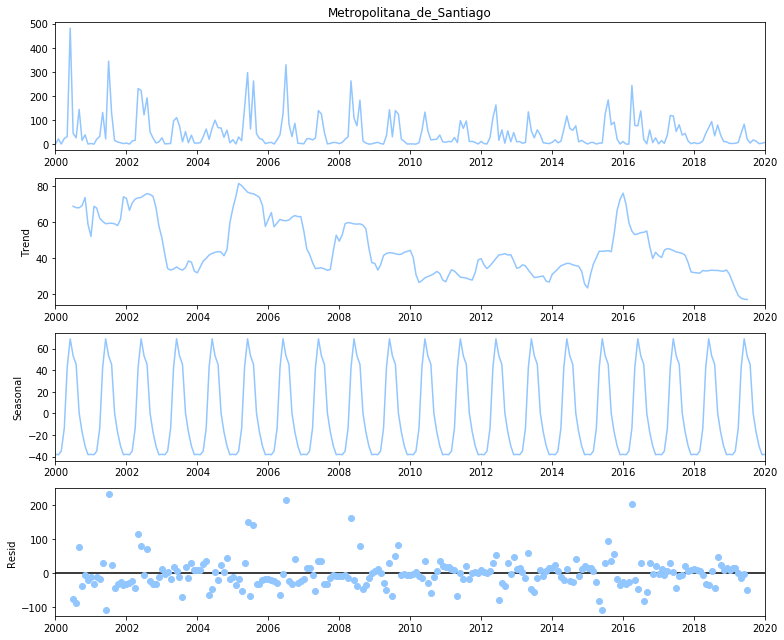

In [291]:
# Llamamos a la funcion entregándole como input: region metropolitana, fecha inicio : 2000-01-01
# fecha termino: 2020-01-01 
region = precipitaciones['Metropolitana_de_Santiago']
grafico_precipitaciones1(region, '01012000', '01012020')


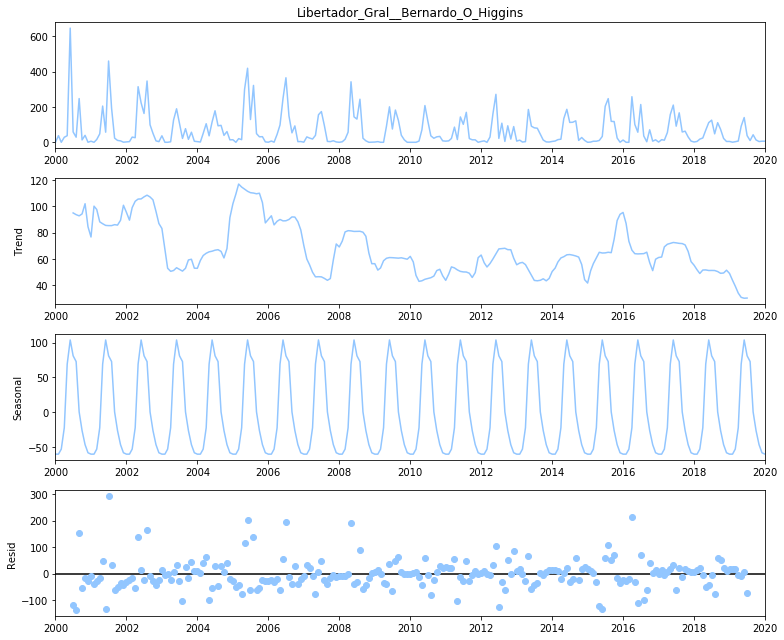

In [292]:
# Llamamos a la funcion entregándole como input: region de ohiggins, fecha inicio : 2000-01-01
# fecha termino: 2020-01-01 
region = precipitaciones['Libertador_Gral__Bernardo_O_Higgins']
grafico_precipitaciones1(region, '01012000', '01012020')

En primer lugar, como es de esperarse, notamos una clara estacionalidad con una frecuencia anual, que nos indica un aumento en las precipitaciones en los meses de invierno para ambas regiones.
Por otro lado, en el gráfico de tendencia, se nota un decrecimiento monótono en la curva a medida que avanzan los años. Se aprecia una disminución sostenida en la cantidad de agua caída en los últimos 40 años, lo que se asocia con el cambio climático. 

3.1.2. Función que grafique series de tiempo mensuales para una región (cada serie de tiempo corresponde a un año).
Argumentos: lista de los años, nombre de la región. 

In [293]:
import datetime
index_month = pd.DatetimeIndex(precipitaciones.index).month
index_year = pd.DatetimeIndex(precipitaciones.index).year


In [294]:
def grafico_precipitaciones2(anos, region):
    """ Description: Grafica series de tiempo mensuales para una region, cada serie es un año
    Args:
        años (list): lista con años que queremos graficar
        region (str): nombre de la region 
    Returns: 
        figura con grafico
    """

    subset = precipitaciones[precipitaciones.index.year.isin(anos)]
    precipitaciones_region = subset[region]
    vals = precipitaciones_region.groupby(lambda x: (x.year, x.month)).sum()
    vals.index = pd.MultiIndex.from_tuples(vals.index)
    vals.unstack(0).plot()

In [295]:
lista_anos = [1982, 1992, 2002, 2012, 2019]
region_series = 'Maule'

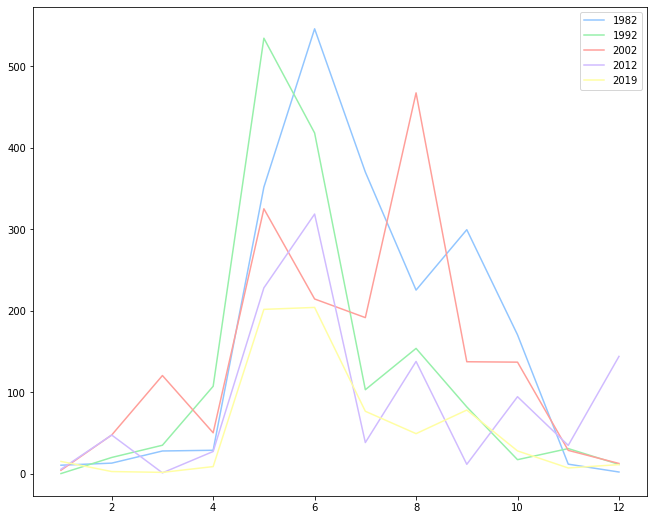

In [296]:
grafico_precipitaciones2(lista_anos, region_series)

A primera vista se observa una clara disminución en la cantidad de agua caída entre las décadas del 80 y 90, respecto de lo que ocurrió desde el año 2000. Además, en los años '82 y '92 se distinguen dos peaks claros, correspondientes a los meses de mayo y agosto. Estos peaks se desplazan un mes y además disminuyen, muy considerablemente para los años 2012 y 2019. 

#### 3.1. Banco Central
Creamos una función que nos permita graficar dos series históricas de PIB para un cierto rango de fchas.
Input: nombre de cada serie, fecha inicio, fecha término.

In [297]:
def grafico_pib(lista_series, fecha_inicio, fecha_termino):
    """ Description: Grafica series de tiempo de una lista de columnas PIB,
    en un rango de fechas
    Args:
        lista_series (list): lista con los nombres de las columnas PIB a graficar
        fechainicio (str): inicio rango fechas
        fechatermino (str): fin rango fechas 
    Returns: 
        figura con grafico
    """
    pib_subset1 = pib[fecha_inicio:fecha_termino]
    pib_subset2 = pib_subset1[lista_series]
    pib_subset2.plot()
    plt.show()


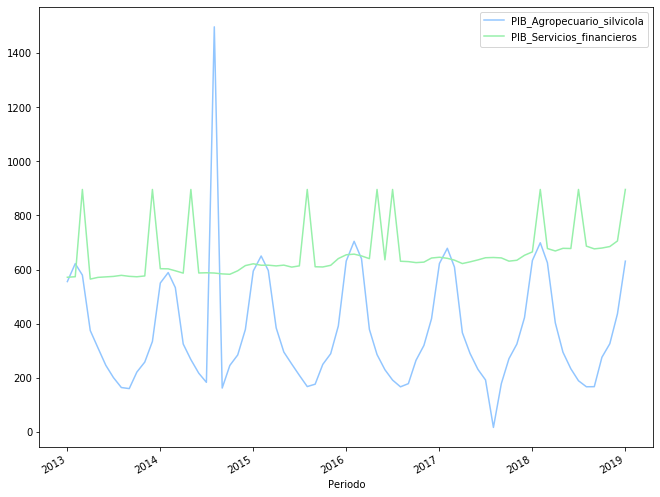

In [298]:
listaseries= ['PIB_Agropecuario_silvicola', 'PIB_Servicios_financieros']
fechainicio='2013-01-01'
fechatermino= '2019-01-01'
grafico_pib(listaseries, fechainicio, fechatermino)

Como se comentó antes, descartamos los valores del PIB para el análisis del modelo, ya que son muy pocos datos. A partir de lo que se observa en le gráfico, no es mucho lo que podría concluir contando con tan pocos puntos. La mayoría de los datos fueron completados con un promedio del resto de la columna. 


### 4. Tratamiento y creación de variables

#### Correlación. 
Debemos poner atención a las correlaciones entre las diferentes series de tiempo ya que de haber una correlación muy alta entre variables (de ± 1 ó 0.9), es probable que el modelo que desarrollemos sea afectado por multicollinearity. Esto último dependerá también del tipo de regresión que apliquemos. En particular, los árboles de decisión son inmunes a este efecto dada la manera en que funcionan, por lo que no tendremos este problema. 

De todas maneras, es conveniente explorar las correlaciones en el  dataset, y puede hacerse rápidamnete usando df.corr() y sns.heatmap(). 

In [48]:
precio_leche = pd.read_csv('precio_leche.csv')

In [49]:
print(precio_leche.isnull().sum())
#No hay missing values 

Anio            0
Mes             0
Precio_leche    0
dtype: int64


In [50]:
print(precio_leche.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Anio          506 non-null    int64  
 1   Mes           506 non-null    object 
 2   Precio_leche  506 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.0+ KB
None


In [51]:
print(precio_leche['Precio_leche'].describe())

count    506.000000
mean     114.444980
std       78.999882
min        3.850000
25%       48.162500
50%      102.250000
75%      189.175000
max      318.880000
Name: Precio_leche, dtype: float64


In [52]:
# creamos un diccionario con el nombre corto de cada mes y su número correspondiente 
meses = [*enumerate(precio_leche.Mes.unique(), 1)]
dict_month = {j:i for i,j in meses}

In [53]:
fechas = []
for i,j in precio_leche.iterrows():
    fecha = '-'.join([str(j['Anio']),str(dict_month[j['Mes']])])
    fechas.append(fecha)

In [54]:
precio_leche['Fecha'] = fechas

In [55]:
#Juntamos por la columna "Fecha" los data frame de las precipitaciones y el precio de la leche 
df_join = pd.merge(precipitaciones, precio_leche, how = 'inner', on = 'Fecha')

In [56]:
#Y unimos lo anterior con los datos del banco central 
df_join2 = pd.merge(df_join, banco_central_, how = 'inner', on = 'Fecha')
df_join2 = df_join2.fillna(df_join2.mean())   

In [60]:
#Eliminamos las columnas que ya no usaremos 
del df_join2['Anio']
del df_join2['Mes']

In [61]:
#Pasamos la columna fecha a formato datetime y la dejamos como index del df 
df_join2.Fecha = pd.to_datetime(df_join2.Fecha)
df_join2.set_index('Fecha', inplace=True)
df_join2.sort_index(inplace=True)

Ahora revisamos las correlaciones del DataFrame completo. 

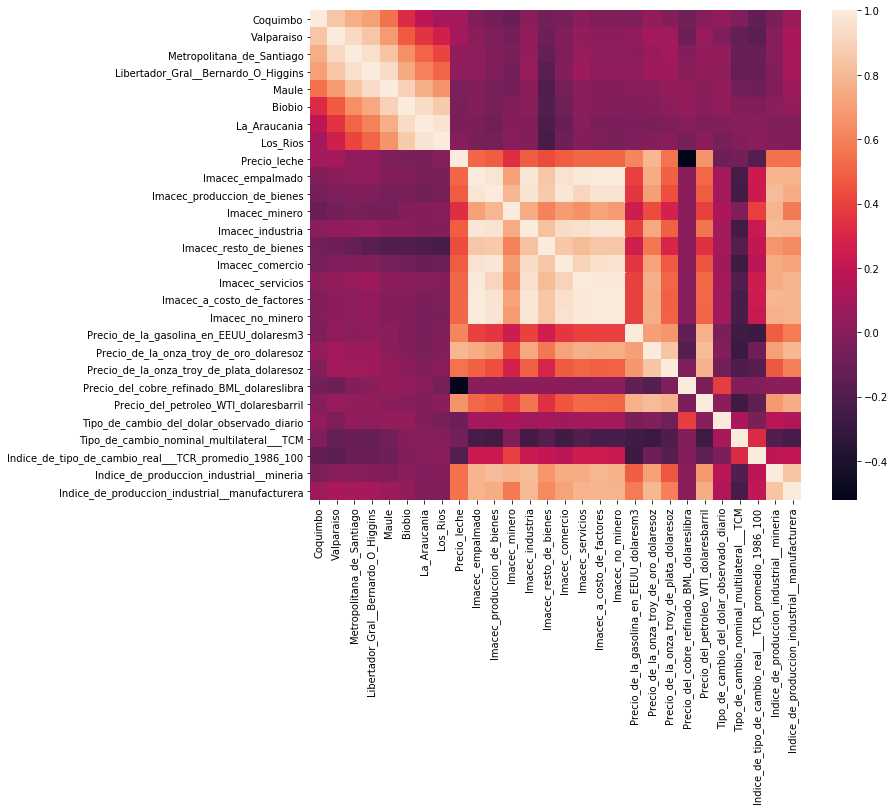

In [103]:
correlations = df_join2.corr() 
sns.heatmap(correlations)

### Creación de variables
Creamos nuevas variables para el año mes y trimestre. 

In [67]:
#Vamos a guardar las nuevas variables en una copia del dataframe, ya que no las usaremos 
df_join2_copy = df_join2.copy()


In [68]:
# Nueva columna variable año 
df_join2_copy['year'] = pd.DatetimeIndex(df_join2_copy.index).year 
#Variable mes 
df_join2_copy['month'] = pd.DatetimeIndex(df_join2_copy.index).month
# Y trimestre (cuarto de año)
df_join2_copy['quarter'] = pd.DatetimeIndex(df_join2_copy['year']).quarter

También podemos crear nuevas variables con lags para estudiar la autocorrelación en las series de tiempo de algunas columnas. Por ejemplo a continuación, para la columna Precio_leche, creamos nuevas variables usando .shift(), que posteriormente podríamos graficar con respecto a otros valores de lag o la columna original. 

In [69]:
number_lags = 3
for lag in range(1, number_lags + 1):
    df_join2_copy['lag_' + str(lag)] = df_join2.Precio_leche.shift(lag)

df_join2_copy.dropna().values

array([[4.59246405e+00, 5.73626624e+00, 8.88337249e+00, ...,
        5.20000000e+00, 5.29000000e+00, 5.79000000e+00],
       [4.05750327e+00, 2.80857143e+00, 8.70317111e+00, ...,
        7.24000000e+00, 5.20000000e+00, 5.29000000e+00],
       [1.07422222e+00, 2.79264610e+00, 7.30045303e+00, ...,
        6.38000000e+00, 7.24000000e+00, 5.20000000e+00],
       ...,
       [1.87237908e+00, 5.17167208e+00, 1.21977181e+01, ...,
        2.16550000e+02, 2.18700000e+02, 2.20020000e+02],
       [1.15882353e-02, 3.08279223e-02, 1.81067114e+00, ...,
        2.43440000e+02, 2.16550000e+02, 2.18700000e+02],
       [2.87895423e-01, 1.65389611e-01, 3.60144295e+00, ...,
        2.51220000e+02, 2.43440000e+02, 2.16550000e+02]])

Creamos un nuevo dataframe que contenga estadísticas relevantes de todas las columnas. De aquí podemos extraer variables para aquellas columnas que más nos interesen, por ejemplo, del precio de la leche. 

In [70]:
stats=pd.DataFrame()    #creamos nuevo data frame 
# creamos columnas con promedio, desviación estándar, varianza, de cada columna
stats['promedio']=df_join2.mean()
stats['desv_est']=df_join2.std()
stats['varianza']=df_join2.var()
stats['mínimo']=df_join.min()
stats['máximo']=df_join.max()
# trasponemos la matriz
stats = (stats.T)

In [71]:
stats['Precio_leche']

promedio     106.55
desv_est    72.4814
varianza    5253.56
mínimo          5.2
máximo       253.86
Name: Precio_leche, dtype: object

### 5. Modelo

Este modelo tiene por objetivo predecir el precio de la leche, es decir, la target variable es un valor continuo y por lo tanto usaremos un árbol de regresión.

In [72]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split 
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn import metrics
# Cross-validation
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score 

In [73]:
#dado que queremos predecir el precio de la leche para un mes en el futuro, debemos generar un shift hacia el futuro
#en la columna de la variable target ('Pecio_leche')
df_join2['Precio_leche'] = df_join2.Precio_leche.shift(1)
df_join2.dropna(how='any', inplace=True)

Separamos el dataset df_join2 en dos tipos de variables:

- X: predictores o variables independientes,
- y: target variable o variables dependientes.

La variable target es lo que queremos predecir, es decir, el precio de la leche. 

In [110]:
X = df_join2.drop('Precio_leche', axis=1)
y = df_join2['Precio_leche']


Dividimos el dataset en training (para construir el modelo) y testing (para evaluar el modelo) set. 

In [111]:
# Separamos los datos 
SEED = 42  # semilla para reproducibilidad. 
# un 30% de los datos será test set. 
X_train, X_test, y_train, y_test = train_test_split (X,y, 
                                                     test_size=0.3, 
                                                     random_state=SEED)

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gb = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 10)

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

mean_squared_error(y_test, y_pred)

343.51936870130555

In [118]:
gb.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>

In [124]:
params_gb = {
    'learning_rate':[0.01, 0.05, 0.1],
    'max_depth': [6, 8, 10],
    
}

grid_gb = GridSearchCV(estimator=gb,
                      param_grid=params_gb,
                      scoring='neg_root_mean_squared_error',
                      cv=10)

grid_gb.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=10,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200,
                                                 n_iter_no_change=None,
               

In [127]:
best_gb = grid_gb.best_estimator_

best_gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls',
                          max_depth=10, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [138]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as MSE


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
regressors = [RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor()]


# Logging for Visual Comparison
log_cols=["Regressor", "Mean squared error"]
log = pd.DataFrame(columns=log_cols)

for reg in regressors:
    reg.fit(X_train, y_train)
    name = reg.__class__.__name__
    
    print("="*50)
    print(name)
    
    print('****Results****')
    y_pred = reg.predict(X_test)
    acc = (MSE(y_test, y_pred))**(1/2)
    print("SMSE:", acc)    
    
    print('****Results****')
    y_pred = reg.predict(X_test)
    acc = r2_score(y, reg.predict(X))
    print("R2: {:.4%}".format(acc)) 
    
    #train_predictions_roc = clf.predict_proba(X_test)[:,1]
    #roc = roc_auc_score(y_test,train_predictions_roc)
    #print("Roc: {:.4%}".format(roc))
    #
    #train_predictions = clf.predict_proba(X_test)
    #ll = log_loss(y_test, train_predictions)
    #print("Log Loss: {}".format(ll))
    #
    #train_predictions = clf.predict(X_test)
    #F1 = f1_score(y_test, train_predictions, average="macro")
    #print("F1 Score: {}".format(F1))
    #
    #train_predictions = clf.predict(X_test)
    #Precision = precision_score(y_test, train_predictions, average="macro")
    #print("Precision: {}".format(Precision))
    #
    #log_entry = pd.DataFrame([[name, acc*100,roc, ll,F1,Precision]], columns=log_cols)
    #log = log.append(log_entry)
    
print("="*50)

RandomForestRegressor
****Results****
SMSE: 14.37848719577931
****Results****
R2: 97.9842%
GradientBoostingRegressor
****Results****
SMSE: 20.69232910036907
****Results****
R2: 97.4324%
AdaBoostRegressor
****Results****
SMSE: 19.187946524327657
****Results****
R2: 97.2440%
DecisionTreeRegressor
****Results****
SMSE: 19.792810802396392
****Results****
R2: 97.6585%


Vemos que el mejor modelo es Random Forest Regressor, con el R cuadrado más alto (97.98%) y el error más bajo (14.37) en comparación con los demás modelos. 

Los parámetros los escogemos considerando las limitaciones de procesamiento del computador.

In [308]:
params = {
    "n_estimators": np.arange(200, 401, 50),
    "max_depth": np.arange(10, 21, 5),
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=params,
                      scoring='neg_root_mean_squared_error',
                      cv=10)


grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [311]:
print("Mejores hiperparametros: ",grid.best_params_)

gb_ = grid.best_estimator_

gb_.fit(X_train, y_train)

print('****Results****')
y_pred = gb_.predict(X_test)
mse_ = (MSE(y_test, y_pred))**(1/2)
print("SMSE:", mse_)    

print('****Results****')
y_pred = gb_.predict(X_test)
r2_ = r2_score(y, gb_.predict(X))
print("R2: {:.4%}".format(r2_)) 


Mejores hiperparametros:  {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}
****Results****
SMSE: 14.722476625965875
****Results****
R2: 97.8712%


Vemos, por el valor de R2, que no hubo una mejora en el modelo. Sin embargo, podríamos hacer tunning con otros hiperparámetros. 

Además, podemos evaluar la elevancia que cada una de las variables tiene en el modelo que elaboramos.

In [314]:
for importance, name in sorted(zip(gb_.feature_importances_, X_train.columns),reverse=True):
    print(name, importance)

Precio_de_la_onza_troy_de_oro_dolaresoz 0.46837981627482084
Imacec_servicios 0.21001493515245237
Imacec_no_minero 0.06836543327637946
Imacec_a_costo_de_factores 0.06290606737564677
Imacec_empalmado 0.039096718013183145
Indice_de_produccion_industrial__mineria 0.03536059671180367
Indice_de_produccion_industrial__manufacturera 0.03031328697652339
Imacec_industria 0.015592940370999266
Imacec_comercio 0.014404712704526855
Tipo_de_cambio_del_dolar_observado_diario 0.010621588604296605
Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100 0.010491766568749289
Imacec_resto_de_bienes 0.00933664242992002
Precio_del_petroleo_WTI_dolaresbarril 0.007482021311470781
Precio_del_cobre_refinado_BML_dolareslibra 0.004978636354380631
Imacec_produccion_de_bienes 0.004341944494542396
Precio_de_la_onza_troy_de_plata_dolaresoz 0.0018174724370293195
Precio_de_la_gasolina_en_EEUU_dolaresm3 0.0015951546530165004
Imacec_minero 0.0012614720427141003
Metropolitana_de_Santiago 0.0007935115791950828
Coquimbo 0.0006

Vemos que varias de las variables tienen una muy baja incidencia en el modelo,en otra versión de este procedimiento, podemos descartar las variables con poco impacto (menor al 1%, por ejemplo).

Para generar el modelo, al dividir en train set y test set, se toma una muestra aleatoria de los datos, dado que contamos con una cantidad muy baja: 400 datos en un plazo de 40 años. Si tuviéramos datos diarios del precio de la leche y otras variables, podríamos hacer una selección temporal de datos de un mes, y con eso entrenar y luego testear el modelo, con la finalidad de usar datos más cercanos temporalmente al momento en que queremos predecir la variable target. 

En la elaboración de este modelo se dejaron fuera todas las variables del PIB, ya que los datos correspondían a menos de un 20% del data frame total. Un nuevo modelo, considerando valores trimestrales del PIB, PIB de alimentos, PIB de bebidas (como están disponibles en la base de datos del Banco Central), podría arrojar mejores predicciones. Asimismo, podríamos haber hecho una elección diferente en el set de datos para el modelo: con una variable trimestral.  

Otras variables que sería interesante conocer serían: 
- precio de la carne de vacuno 
- exportación de leche de vaca, y exportación de carne de vacuno (con respecto a PIB, PIB Alimentos, PIB bebidas)
- producción de leche vegetal a nivel nacional 
- importación de leche vegetal 
- hábitos de consumo de leche de vaca versus leche de origen vegetal (si es que están disponibles)
- erosión del suelo en regiones de Chile, ya que se asocia no solo a una disminución de las precipitaciones sino también a otros factores. 

También, desde un punto de vista cualitativo:
- qué dice la normativa de RILes (Residuos Industriales Líquidos), considerando que la producción de leche de vaca a nivel industrial implica usar grandes cantidades de agua para mantener maquinaria industrial limpia, así como desechando esos volúmenes de agua con una alta carga bacterial.
- dicha normativa podría endurecerse en los próximos años, generando un impacto en la industria lechera. 


En cuanto al cambio climático, es claro que la producción de carne y leche animal produce un impacto negativo a nivel medioambiental; también sabemos que la sequía en Chile continuaría avanzando. 
La elaboración de un modelo adecuado podría ayudarnos a predecir cómo subirá el precio de la leche en los próximos años, al punto que:
1. los productores tendrán que subir los valores cada vez más
2. en un momento la producción de leche animal dejará de ser rentable 
Además, los hábitos de consumo de las personas también están cambiando: cada vez es mayor la demanda y por tanto la oferta de alternativas como bebidas lácteas a base de almendras, soya, coco, avena, entre otras. 


Finalmente, una limitación importante en el desarrollo de este modelo fue la cantidad de datos faltantes. Se podrían obtener mejores métricas si se tuviera un dataset más completo desde la base de datos correspondiente (imagino que más allá del propósito de esta tarea, ya que sino no lidiaríamos con el proceso de limpieza de datos).